In [388]:
import turicreate as tc
import numpy as np

In [389]:
tc.__version__

'6.4.1'

In [390]:
from pymongo import MongoClient

In [391]:
client = MongoClient(serverSelectionTimeoutMS=50)
db = client.turidatabase

In [392]:
db.labeledinstances.find({'dsid': 5})

In [393]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, serverselectiontimeoutms=50), 'turidatabase')

In [394]:
def get_dataset_data(dsid):
    features = []
    labels = []
    
    for a in db.labeledinstances.find({"dsid": dsid}):
        features.append([float(val) for val in a['feature']])
        labels.append(a['label'])
    data = {'target': labels, 'sequence':np.array(features)}
    
    return data


def get_dataset_sframe(dsid):
    data = get_dataset_data(dsid)
    return tc.SFrame(data=data)


In [395]:
sframe_colors = tc.SFrame.read_csv('./capture-mathod-flash-on.csv')

Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 100 lines in 0.04607 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 951 lines in 0.00977 secs.

In [396]:
sframe_colors

red,green,blue,target
226.24744897959184,202.7944606413994,181.40962099125363,white
160.03279883381924,9.325801749271136,12.466107871720116,red
220.64395043731776,199.8338192419825,176.76384839650146,white
241.21137026239063,103.66180758017492,29.419460641399414,orange
71.08491253644314,151.94460641399417,60.61807580174927,green
196.34365889212827,179.62208454810497,162.02004373177843,white
195.65524781341108,181.6865889212828,166.10204081632654,white
197.48943148688048,70.49781341107871,6.662900874635568,orange
208.2084548104956,91.54227405247812,18.651967930029155,orange
160.70845481049562,22.25546647230321,20.51639941690962,red


In [397]:
 import turicreate.aggregate as agg
sframe_colors.groupby('target',operations={'count': agg.COUNT()})

target,count
green,138
orange,151
blue,145
yellow,149
red,223
white,145


## Graph the colors

In [398]:
x = sframe_colors['red']
y = sframe_colors['green']
scply = tc.visualization.scatter(x,y)
scply.show()

In [399]:
sframe_colors = tc.SFrame.read_csv('./capture-mathod-flash-on.csv')
df = sframe_colors.to_dataframe()

Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 100 lines in 0.005549 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 951 lines in 0.003066 secs.

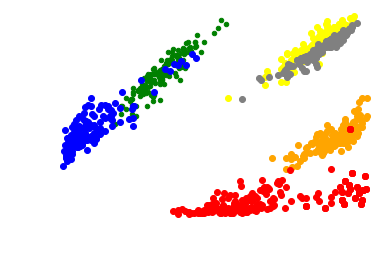

In [415]:

plt = df[df.target == 'green'].plot.scatter(x='red', y = 'green', c='Green')
plt.scatter(x = df[df.target == "yellow"]['red'], y = df[df.target == "yellow"]['green'], c='Yellow')
plt.scatter(x = df[df.target == "white"]['red'], y = df[df.target == "white"]['green'], c='Grey')
plt.scatter(x = df[df.target == "orange"]['red'], y = df[df.target == "orange"]['green'], c='Orange')
plt.scatter(x = df[df.target == "red"]['red'], y = df[df.target == "red"]['green'], c='Red')
plt.scatter(x = df[df.target == "blue"]['red'], y = df[df.target == "blue"]['green'], c='Blue')

plt.spines['left'].set_color('white')
plt.spines['right'].set_color('white')
plt.spines['top'].set_color('white')
plt.spines['bottom'].set_color('white')
plt.xaxis.label.set_color('white')
plt.yaxis.label.set_color('white')
plt.tick_params(axis='x', colors='white') 
plt.tick_params(axis='y', colors='white') 

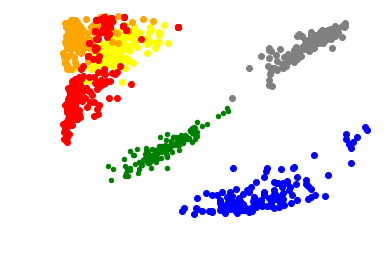

In [416]:
df = sframe_colors.to_dataframe()
plt = df[df.target == 'green'].plot.scatter(x='blue', y = 'red', c='Green')
plt.scatter(x = df[df.target == "yellow"]['blue'], y = df[df.target == "yellow"]['red'], c='Yellow')
plt.scatter(x = df[df.target == "white"]['blue'], y = df[df.target == "white"]['red'], c='Grey')
plt.scatter(x = df[df.target == "orange"]['blue'], y = df[df.target == "orange"]['red'], c='Orange')
plt.scatter(x = df[df.target == "red"]['blue'], y = df[df.target == "red"]['red'], c='Red')
plt.scatter(x = df[df.target == "blue"]['blue'], y = df[df.target == "blue"]['red'], c='Blue')

plt.spines['left'].set_color('white')
plt.spines['right'].set_color('white')
plt.spines['top'].set_color('white')
plt.spines['bottom'].set_color('white')
plt.xaxis.label.set_color('white')
plt.yaxis.label.set_color('white')
plt.tick_params(axis='x', colors='white') 
plt.tick_params(axis='y', colors='white') 

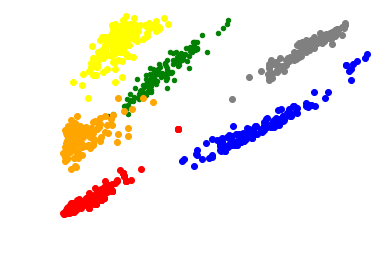

In [417]:
df = sframe_colors.to_dataframe()
plt = df[df.target == 'green'].plot.scatter(x='blue', y = 'green', c='Green')
plt.scatter(x = df[df.target == "yellow"]['blue'], y = df[df.target == "yellow"]['green'], c='Yellow')
plt.scatter(x = df[df.target == "white"]['blue'], y = df[df.target == "white"]['green'], c='Grey')
plt.scatter(x = df[df.target == "orange"]['blue'], y = df[df.target == "orange"]['green'], c='Orange')
plt.scatter(x = df[df.target == "red"]['blue'], y = df[df.target == "red"]['green'], c='Red')
plt.scatter(x = df[df.target == "blue"]['blue'], y = df[df.target == "blue"]['green'], c='Blue')


plt.spines['left'].set_color('white')
plt.spines['right'].set_color('white')
plt.spines['top'].set_color('white')
plt.spines['bottom'].set_color('white')
plt.xaxis.label.set_color('white')
plt.yaxis.label.set_color('white')
plt.tick_params(axis='x', colors='white') 
plt.tick_params(axis='y', colors='white') 

## Create a defualt model

In [403]:
data_train[['red', 'green', 'blue']]

red,green,blue
220.64395043731776,199.8338192419825,176.76384839650146
241.21137026239063,103.66180758017492,29.419460641399414
71.08491253644314,151.94460641399417,60.61807580174927
196.34365889212827,179.62208454810497,162.02004373177843
195.65524781341108,181.6865889212828,166.10204081632654
197.48943148688048,70.49781341107871,6.662900874635568
160.70845481049562,22.25546647230321,20.51639941690962
214.2915451895044,208.14613702623907,63.40196793002915
191.6793002915452,184.2069970845481,53.670918367346935
60.6698250728863,124.009110787172,156.908527696793


In [404]:
sframe_colors = tc.SFrame.read_csv('./capture-mathod-flash-on.csv')
sframe_colors.groupby('target',operations={'count': agg.COUNT()})

Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 100 lines in 0.022408 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 951 lines in 0.005227 secs.

target,count
green,138
orange,151
blue,145
yellow,149
red,223
white,145


In [405]:

data_train, data_test = sframe_colors.random_split(0.8)

#model = tc.classifier.create(data_train, target='target', verbose=False)

tc.nearest_neighbor_classifier.create(data_train, target='target',
                                          features=['red', 'green', 'blue'])

yhat = model.predict(data_test)
acc = sum(yhat == data_test['target'])/ float(len(data_test))
print('Acc:', acc)
model.export_coreml('./colors.mlmodel')

Starting ball tree nearest neighbors model training.

+------------+--------------+

| Tree level | Elapsed Time |

+------------+--------------+

| 0          | 849us        |

+------------+--------------+

Acc: 0.9441624365482234


In [406]:
data_test['yhat'] = yhat 

In [407]:
x = data_test['target' == 'red']

In [408]:
sf_filter = data_test[data_test.apply(lambda x: x['yhat'] != x['target'])] 

In [409]:
data_test[data_test['target'] != data_test['yhat']]

red,green,blue,target,yhat
108.53455964325528,187.93088071348944,216.83389074693423,blue,white
97.24860646599775,174.57413600891863,202.41192865105907,blue,white
229.0880713489409,29.214046822742475,32.88015607580825,red,orange
242.8355629877369,30.19732441471572,38.50613154960981,red,orange
229.0880713489409,29.214046822742475,32.88015607580825,red,orange
246.2965440356745,30.711259754738016,38.20345596432553,red,orange
237.2051282051282,50.43701226309922,46.4314381270903,red,orange
231.44258639910817,41.28260869565217,48.517279821627646,red,orange
247.81939799331104,47.37290969899666,47.09866220735786,red,orange
247.81939799331104,47.37290969899666,47.09866220735786,red,orange


In [410]:
sf_filter

red,green,blue,target,yhat
108.53455964325528,187.93088071348944,216.83389074693423,blue,white
97.24860646599775,174.57413600891863,202.41192865105907,blue,white
229.0880713489409,29.214046822742475,32.88015607580825,red,orange
242.8355629877369,30.19732441471572,38.50613154960981,red,orange
229.0880713489409,29.214046822742475,32.88015607580825,red,orange
246.2965440356745,30.711259754738016,38.20345596432553,red,orange
237.2051282051282,50.43701226309922,46.4314381270903,red,orange
231.44258639910817,41.28260869565217,48.517279821627646,red,orange
247.81939799331104,47.37290969899666,47.09866220735786,red,orange
247.81939799331104,47.37290969899666,47.09866220735786,red,orange
